## Credit Card Fraud Dataset

### Loading Dataset and Modules

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

In [2]:
###Load the dataset
df = pd.read_csv('creditcard.csv')

### Exploratory Data Analysis

In [3]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


We can see that there are  Amount, Time and 28 other features for the dataset. The Class is the variable class which has to be predicted through our models.


In [5]:
###CHeck the data size
df.shape

(284807, 31)

In [6]:
###Check the class values
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds cases are', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds cases are', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds cases are 99.83 % of the dataset
Frauds cases are 0.17 % of the dataset


In [8]:
###Check for null values
df.isnull().sum().max()


0

In [9]:
###Check information about other features
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


(0.0, 172792.0)

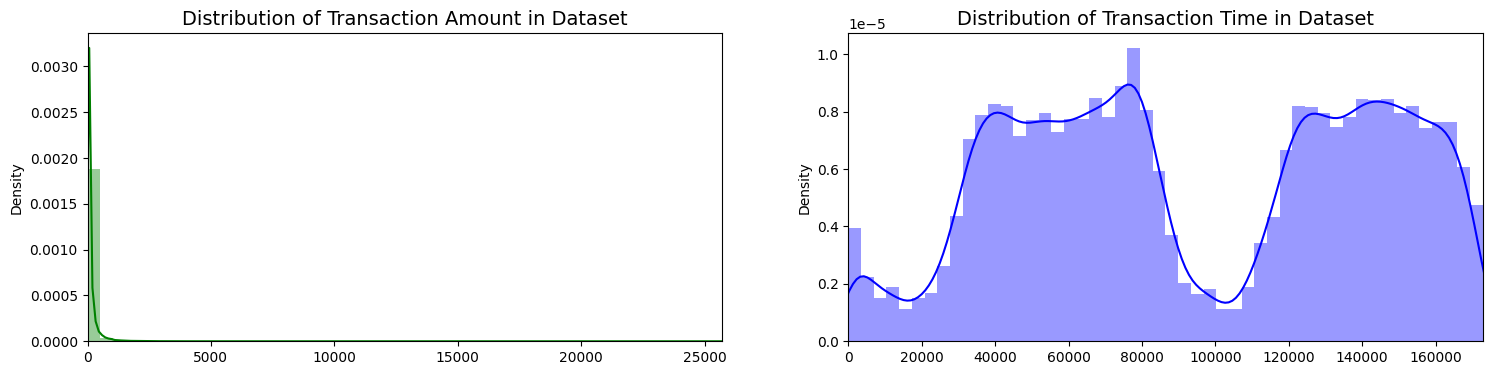

In [10]:
###Let's check distrbiution of time and amount
import seaborn as sns
import matplotlib.pyplot as plt
amount = df['Amount'].values
time = df['Time'].values

fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.distplot(amount, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount in Dataset', fontsize=14)
ax[0].set_xlim([min(amount), max(amount)])

sns.distplot(time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time in Dataset', fontsize=14)
ax[1].set_xlim([min(time), max(time)])

### Scaling the Dataset

In [3]:
# will be scaling our dataset 
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['amount_scaled'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [4]:
###Next we will be splitting the dataset and making prediction
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### Performance Evaluation using Various Models

In [23]:
# Let's implement simple classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [24]:
###Here doing prediction using cross validation
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "The training score is", round(score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression The training score is 100.0 % accuracy score
Classifiers:  DecisionTreeClassifier The training score is 100.0 % accuracy score


In [25]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(classifiers['LogisiticRegression'], X_train, y_train, cv=5,
                             method="decision_function")


tree_pred = cross_val_predict(classifiers['DecisionTreeClassifier'], X_train, y_train, cv=5)

In [26]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression Performance: ', roc_auc_score(y_train, log_reg_pred))
print('Decision Tree Classifier Performance: ', roc_auc_score(y_train, tree_pred))

Logistic Regression Performance:  0.9765220475779611
Decision Tree Classifier Performance:  0.8829805413324144


We can see that logistic regression performs better than decision tree on training dataset.


In [31]:
from sklearn.model_selection import cross_val_predict


log_reg_pred = cross_val_predict(classifiers['LogisiticRegression'], X_test, y_test, cv=5,
                             method="decision_function")


tree_pred = cross_val_predict(classifiers['DecisionTreeClassifier'], X_test, y_test, cv=5)

In [32]:
print('Logistic Regression Performance: ', roc_auc_score(y_test, log_reg_pred))
print('Decision Tree Classifier Performance: ', roc_auc_score(y_test, tree_pred))

Logistic Regression Performance:  0.9503392627450531
Decision Tree Classifier Performance:  0.8518122006821862


Now we can see on test dataset the performance of logistic regression is still better than decision tree.

We will use new models to check the performance with them.

In [15]:
###Using KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
#knn_classifier.fit(X_train, y_train)



In [33]:
classifiers["knn_classifier"] = knn_classifier

In [17]:
classifiers["knn_classifier"].fit(X_train, y_train)
score = cross_val_score(classifiers["knn_classifier"], X_train, y_train, cv=5)

In [18]:
print("Classifiers: KNN and The training score is", round(score.mean(), 2) * 100, "% accuracy score")

Classifiers: KNN and The training score is 100.0 % accuracy score


So KNN giving 100% accuracy score on training dataset, let's check performance on test dataset as well with roc_auc_Score.

In [37]:
knn_pred = cross_val_predict(classifiers['knn_classifier'], X_train, y_train, cv=5)
print('knn_classifier ROC AUC Performance Training Dataset', roc_auc_score(y_train, knn_pred))

knn_classifier ROC AUC Performance Training Dataset 0.8717658594486808


In [36]:
knn_pred = cross_val_predict(classifiers['knn_classifier'], X_test, y_test, cv=5)
print('knn_classifier ROC AUC Performance Testing Dataset: ', roc_auc_score(y_test, knn_pred))

knn_classifier ROC AUC Performance Testing Dataset:  0.8212966777876035


Next we will be using XGBOOST Model

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
xgb_classifier = XGBClassifier()
classifiers["xgb_classifier"] = xgb_classifier

In [39]:
###Check accuracy score on training dataset
score = cross_val_score(classifiers["knn_classifier"], X_train, y_train, cv=5)
print("Classifiers: XGBoost and The training score is", round(score.mean(), 2) * 100, "% accuracy score")

Classifiers: XGBoost and The training score is 100.0 % accuracy score


In [40]:
#Check performance on training dataset using ROC_AUC score
xgboost_pred = cross_val_predict(classifiers['xgb_classifier'], X_train, y_train, cv=5)
print('xgb_classifier ROC AUC Performance Training Dataset', roc_auc_score(y_train, xgboost_pred))


[13:01:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [41]:
#Check performance on tesing dataset using ROC_AUC score
xgboost_pred = cross_val_predict(classifiers['xgb_classifier'], X_test, y_test, cv=5)
print('xgb_classifier ROC AUC Performance Testing Dataset: ', roc_auc_score(y_test, xgboost_pred))

[13:06:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:07:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:07:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:07:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

Next we will checking the performance with the bagging model : Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
classifiers["rf_classifier_pred"] = rf_classifier


In [43]:
#Check performance on training dataset using ROC_AUC score
rf_classifier_pred = cross_val_predict(classifiers['rf_classifier'], X_train, y_train, cv=5)
print('rf_classifier ROC AUC Performance Training Dataset', roc_auc_score(y_train, rf_classifier_pred))

rf_classifier ROC AUC Performance Training Dataset 0.8832157568293785


In [45]:
#Check performance on tesing dataset using ROC_AUC score
rf_classifier_pred = cross_val_predict(classifiers['rf_classifier'], X_test, y_test, cv=5)
print('rf_classifier_pred ROC AUC Performance Testing Dataset: ', roc_auc_score(y_test, rf_classifier_pred))

rf_classifier_pred ROC AUC Performance Testing Dataset:  0.8519880588701435


### Oversampling and Undersampling of Dataset

#### UnderSampling

In [9]:
###First we will Check performance with RandomUNder Sampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

# Apply RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


Next we will evaluate performance with one of our best model xgboost.

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
classifiers = {}
xgb_classifier = XGBClassifier()
classifiers["xgb_classifier"] = xgb_classifier

In [17]:
#Check performance on training dataset using ROC_AUC score
xgboost_pred = cross_val_predict(classifiers['xgb_classifier'], X_resampled, y_resampled, cv=5)
print('xgb_classifier ROC AUC Performance Training Dataset', roc_auc_score(y_resampled, xgboost_pred))

[09:57:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:57:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:57:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:57:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [18]:
#Check performance on tesing dataset using ROC_AUC score
xgboost_pred = cross_val_predict(classifiers['xgb_classifier'], X_test, y_test, cv=5)
print('xgb_classifier ROC AUC Performance Testing Dataset: ', roc_auc_score(y_test, xgboost_pred))

[09:58:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:58:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:58:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:58:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

We can see performance improvement in ROC-AUC score using the randomundersampler.

#### Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train)

In [ ]:
###We will create a new object of XGBClassifier to check performance
xgb_classifier_2 = XGBClassifier()

In [21]:
#Check performance on training dataset using ROC_AUC score
xgboost_pred = cross_val_predict(xgb_classifier_2, X_oversampled, y_oversampled, cv=1)
print('xgb_classifier ROC AUC Performance Training Dataset', roc_auc_score(y_oversampled, xgboost_pred))

[10:02:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [22]:
#Check performance on tesing dataset using ROC_AUC score
xgboost_pred = cross_val_predict(xgb_classifier_2, X_test, y_test, cv=5)
print('xgb_classifier ROC AUC Performance Testing Dataset: ', roc_auc_score(y_test, xgboost_pred))

[10:16:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

#### Adaptive Synthetic Sampling

In [23]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)


In [26]:
xgb_classifier_3 = XGBClassifier()

In [27]:
#Check performance on training dataset using ROC_AUC score
xgboost_pred = cross_val_predict(xgb_classifier_3, X_resampled, y_resampled, cv=5)
print('xgb_classifier ROC AUC Performance Training Dataset', roc_auc_score(y_resampled, xgboost_pred))

[10:18:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:21:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:25:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:28:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [28]:
#Check performance on tesing dataset using ROC_AUC score
xgboost_pred = cross_val_predict(xgb_classifier_3, X_test, y_test, cv=5)
print('xgb_classifier ROC AUC Performance Testing Dataset: ', roc_auc_score(y_test, xgboost_pred))

[10:34:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:34:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:34:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:34:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### Hyperparameter Tuning

We will be checking the performance with xgboost classifier and doing hyperparameter tuning.
Also we will be using resampled dataset using Random Undersampler from previous case as it takes least time to train this model and performance wise it is similar to other sampling techniques.

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler

In [7]:
# Apply RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [8]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [12]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': np.linspace(0.01, 0.1, 5),
    'max_depth': range(5, 10),
    'min_child_weight': range(4, 6),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'n_estimators': [100, 200]
}

In [15]:
# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_grid,
    scoring='roc_auc',  # Evaluation metric
    cv=2,  # Cross-validation folds
    verbose=2,  # Verbosity level
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)


In [ ]:
# Perform random search for hyperparameter tuning
random_search.fit(X_resampled, y_resampled)


In [17]:

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [19]:
best_params

{'subsample': 0.8,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 9,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [20]:
best_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [18]:
# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate ROC-AUC score on the test set
roc_auc = roc_auc_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("ROC-AUC Score:", roc_auc)

Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
ROC-AUC Score: 0.9510457460981017


## Student Exam Performance Dataset

Reference  : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.shape

(1000, 8)

### Data Preprocessing

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
###We will primarily focus on predicting Math Score
selected_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score']
df = df[selected_cols]

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
dtype: int64

In [7]:
###Next we will do Encoding of data
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(df[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=one_hot_encoder.get_feature_names(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']))

In [8]:
encoded_df.shape

(1000, 17)

### Modelling

In [16]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
X = encoded_df
y = df['math score']
def compute_performance(X,y,model,model_name):

    # Choose the number of folds for cross-validation
    num_folds = 5

    # Initialize the cross-validation method (e.g., KFold)
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get the R-squared scores for each fold
    cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')


    # Calculate the average R-squared score across all folds
    average_r2 = np.mean(cross_val_scores)
    print(f"Average R-squared with {model_name} : {average_r2:.4f}")


In [17]:
###Linear Regression Performance
model = LinearRegression()
model_name = 'LinearRegression'
compute_performance(X,y,model,model_name)

Average R-squared with LinearRegression : 0.2150


In [18]:
###Decision Tree Performance
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree regression model
model = DecisionTreeRegressor()

model_name = 'DecisionTreeRegressor'
compute_performance(X,y,model,model_name)


Average R-squared with DecisionTreeRegressor : -0.1422


In [19]:
import xgboost as xgb

# Create an XGBoost regression model
model = xgb.XGBRegressor()


model_name = 'XGBRegressor'
compute_performance(X,y,model,model_name)


Average R-squared with XGBRegressor : -0.1342


In [20]:
from sklearn.neighbors import KNeighborsRegressor
# Create an XGBoost regression model
model = KNeighborsRegressor(n_neighbors=5) 


model_name = 'KNeighborsRegressor'
compute_performance(X,y,model,model_name)

Average R-squared with KNeighborsRegressor : 0.0283


### Hyperparameter Tuning of XGBoost Regressor

In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston  # Example dataset
from sklearn.model_selection import train_test_split



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'max_depth': [3, 4, 5],           # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.5], # Step size shrinkage
    'subsample': [0.8, 1.0],           # Fraction of samples used for fitting
    'colsample_bytree': [0.8, 1.0]     # Fraction of features used for fitting
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Negate the score to get positive MSE


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 190.42251912536796


In [25]:
# Create an XGBoost regressor with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**grid_search.best_params_)


In [26]:
###Let's evaluate the performance
model_name = 'HyperTuned XGBRegressor'
compute_performance(X,y,best_xgb_model,model_name)

Average R-squared with HyperTuned XGBRegressor : 0.1654
